# Step-1 importing the libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the Data

### ● Read the “housing.csv” file from the folder into the program.

In [2]:
dataset=pd.read_excel('housing_dataset.xlsx')

### ● Print first few rows of this data.


In [3]:
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


### ● Extract input (X) and output (Y) data from the dataset.

In [5]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, [-1]].values

# Step 2: Handle missing values :


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null int64
total_rooms           20640 non-null int64
total_bedrooms        20433 non-null float64
population            20640 non-null int64
households            20640 non-null int64
median_income         20640 non-null float64
ocean_proximity       20640 non-null object
median_house_value    20640 non-null int64
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [7]:
X

array([[-122.23, 37.88, 41, ..., 126, 8.3252, 'NEAR BAY'],
       [-122.22, 37.86, 21, ..., 1138, 8.3014, 'NEAR BAY'],
       [-122.24, 37.85, 52, ..., 177, 7.2574, 'NEAR BAY'],
       ...,
       [-121.22, 39.43, 17, ..., 433, 1.7, 'INLAND'],
       [-121.32, 39.43, 18, ..., 349, 1.8672, 'INLAND'],
       [-121.24, 39.37, 16, ..., 530, 2.3886, 'INLAND']], dtype=object)

In [8]:
y

array([[452600],
       [358500],
       [352100],
       ...,
       [ 92300],
       [ 84700],
       [ 89400]], dtype=int64)

### ● Fill the missing values with the mean of the respective column.

In [9]:
from sklearn.preprocessing import Imputer

In [10]:
missingValueImputer = Imputer()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [11]:
X[:, :-1] = missingValueImputer.fit_transform(X[:, :-1])

In [13]:
y = missingValueImputer.fit_transform(y)

# 3. Encode categorical data :


### ● Convert categorical column in the dataset to numerical data.


In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
X_labelencoder = LabelEncoder()

In [17]:
X[:, -1] = X_labelencoder.fit_transform(X[:, -1])

# 4. Split the dataset :


### ● Split the data into 80% training dataset and 20% test dataset.

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2,random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 9), (4128, 9), (16512, 1), (4128, 1))

# 5. Standardize data :


### ● Standardize training and test datasets.


In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler=StandardScaler()

In [23]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
y_train=scaler.fit_transform(y_train)
y_test=scaler.transform(y_test)

-----

# 6. Perform Linear Regression :


### ● Perform Linear Regression on training data.

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
Lr=LinearRegression()
Lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### ● Predict output for test dataset using the fitted model.


In [29]:
Lrpredict=Lr.predict(X_test)

### ● Print root mean squared error (RMSE) from Linear Regression.


In [31]:
from sklearn.metrics import mean_squared_error

In [32]:
mse=mean_squared_error(y_test,Lrpredict)

In [33]:
print('Root mean squared error (RMSE) from Linear Regression = ')
print(mse)

Root mean squared error (RMSE) from Linear Regression = 
0.3643080104280694


______


# 7. Perform Decision Tree Regression :


### ● Perform Decision Tree Regression on training data.

In [34]:
from sklearn.tree import DecisionTreeRegressor

In [37]:
DTregressor = DecisionTreeRegressor()
DTregressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

### ● Predict output for test dataset using the fitted model.

In [38]:
DTpredict=DTregressor.predict(X_test)

### ● Print root mean squared error from Decision Tree Regression.

In [39]:
DTmse=mean_squared_error(y_test,DTpredict)

In [41]:
print('Root mean squared error from Decision Tree Regression = ')
print(DTmse)

Root mean squared error from Decision Tree Regression = 
0.33803175009837794


# 8. Perform Random Forest Regression :


### ● Perform Random Forest Regression on training data.


In [42]:
from sklearn.ensemble import RandomForestRegressor

In [43]:
RFRegresser=RandomForestRegressor()

In [44]:
RFRegresser.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

### ● Predict output for test dataset using the fitted model.


In [45]:
RFpredict=RFRegresser.predict(X_test)

### ● Print RMSE (root mean squared error) from Random Forest Regression.


In [46]:
RFmse=mean_squared_error(y_test,RFpredict)

In [47]:
print('Root mean squared error from Random Forest Regression = ')
print(RFmse)

Root mean squared error from Random Forest Regression = 
0.19516472247282635


-----

# 9. Bonus exercise: Perform Linear Regression with one independent variable :


### Extract just the median_income column from the independent variables
### (from X_train and X_test).


In [49]:
X_train_median_income = X_train[: , [7]]
X_test_median_income = X_test[: , [7]]

### ● Perform Linear Regression to predict housing values based on median_income.


In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
Lr2=LinearRegression()

In [52]:
Lr2.fit(X_train_median_income,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### ● Predict output for test dataset using the fitted model.

In [53]:
Lr2predict=Lr2.predict(X_test_median_income)

### ● Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data.

###  Visualising train dataset

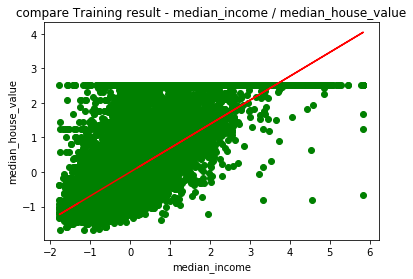

In [56]:
plt.scatter(X_train_median_income, y_train, color = 'green')
plt.plot (X_train_median_income, Lr2.predict(X_train_median_income), color = 'red')
plt.title ('compare Training result - median_income / median_house_value')
plt.xlabel('median_income')
plt.ylabel('median_house_value')
plt.show()

### Visualising Train Dataset

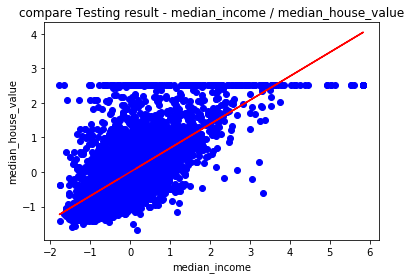

In [58]:
plt.scatter(X_test_median_income, y_test, color = 'blue')
plt.plot (X_test_median_income, Lr2.predict(X_test_median_income), color = 'red')
plt.title ('compare Testing result - median_income / median_house_value')
plt.xlabel('median_income')
plt.ylabel('median_house_value')
plt.show()
